In [3]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [4]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

par = model.par
ss = model.ss
sol = model.sol

In [5]:
ModelList = model.multi_model('Lambda',[0.1,0.25,0.50],ncol=3)
ModelList[0].par.Lambda, ModelList[1].par.Lambda, ModelList[2].par.Lambda

Jacobian calculated in 1.0 mins 2 secs
Jacobian calculated in 28.8 secs
Jacobian calculated in 30.3 secs


(0.1, 0.25, 0.5)

# Find IRF

In [6]:
Tshock = 50
persistence = 0.80**np.arange(Tshock)

for i in range(len(ModelList)):
    ModelList[i].set_exo_ss()
    ModelList[i].set_unknowns_ss()

    shock = 0.01*ModelList[i].ss.Gamma
    ModelList[i].sol.Gamma[:Tshock] = ModelList[i].ss.Gamma + shock*persistence

    ModelList[i].find_IRF()


initial:
   max. abs. error = 8.01e-01
    7.15e-15 in A_R_ini_error
    7.02e-14 in Aq_diff
    1.43e-03 in bargaining_cond
    4.44e-16 in FOC_capital_agency
    1.15e-14 in FOC_K_ell
    8.01e-01 in mkt_clearing
    9.90e-03 in PC

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 8.01e-01
    7.20e-05 in A_R_ini_error
    2.97e-06 in Aq_diff
    1.41e-05 in bargaining_cond
    1.62e-05 in FOC_capital_agency
    6.46e-04 in FOC_K_ell
    9.21e-03 in mkt_clearing
    1.78e-04 in PC
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 9.21e-03
    7.08e-07 in A_R_ini_error
    6.03e-08 in Aq_diff
    2.05e-07 in bargaining_cond
    8.62e-07 in FOC_capital_agency
    1.27e-05 in FOC_K_ell
    2.17e-04 in mkt_clearing
    2.81e-06 in PC
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.17e-04
    1.33e-08 in A_R_ini_error
    6.21e-10 in Aq_diff
    3.09e-09 in b

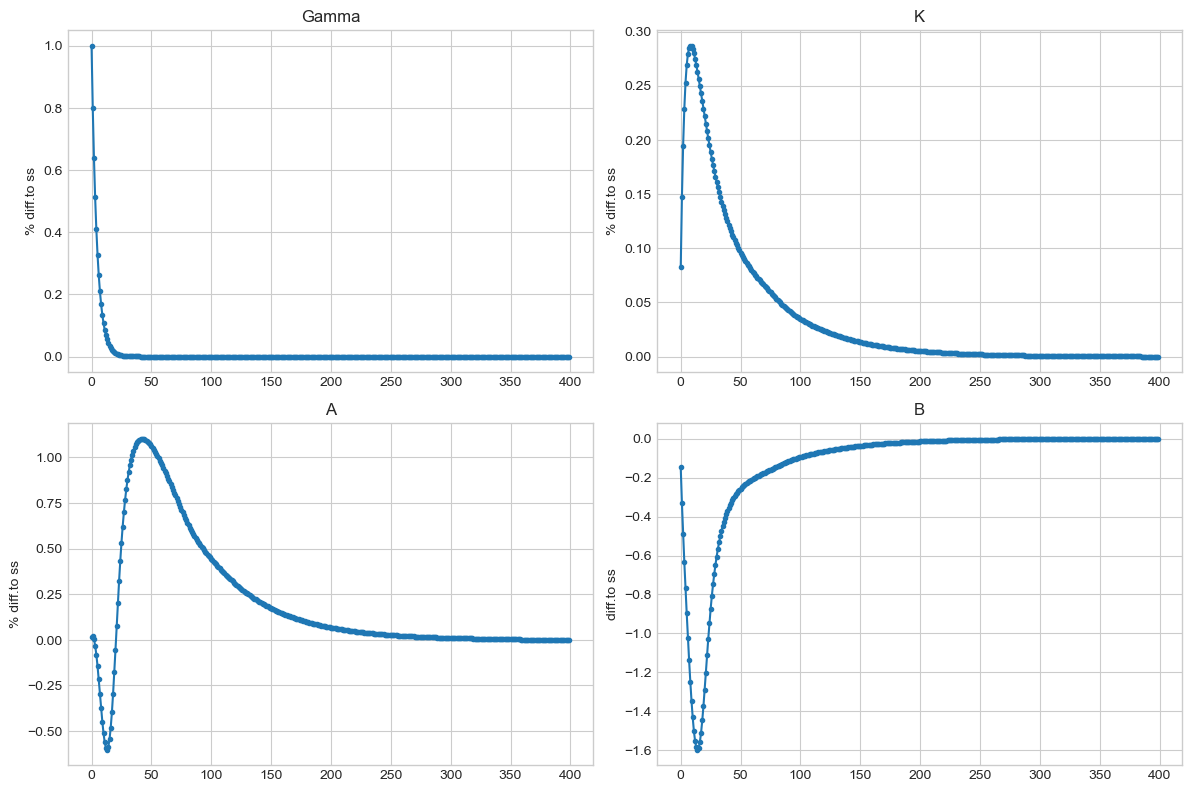

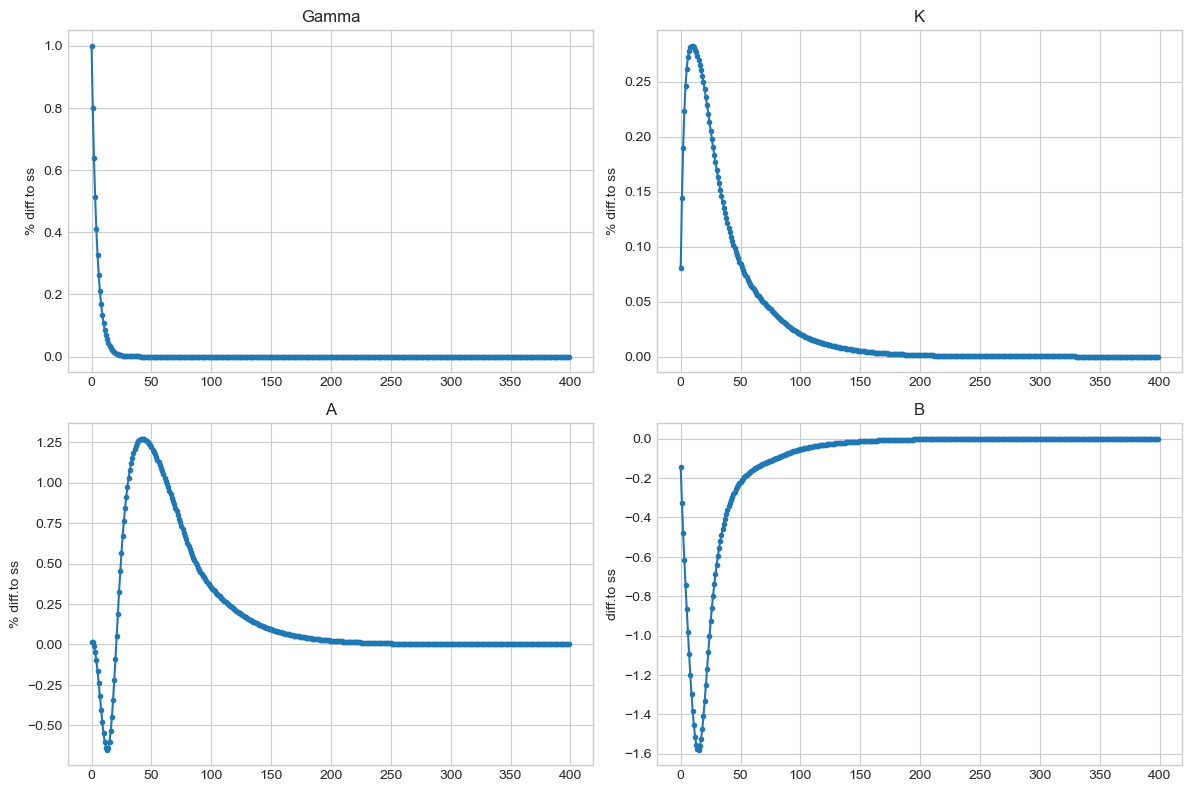

In [10]:
ModelList[0].plot_IRF(varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2)
ModelList[2].plot_IRF(varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2)

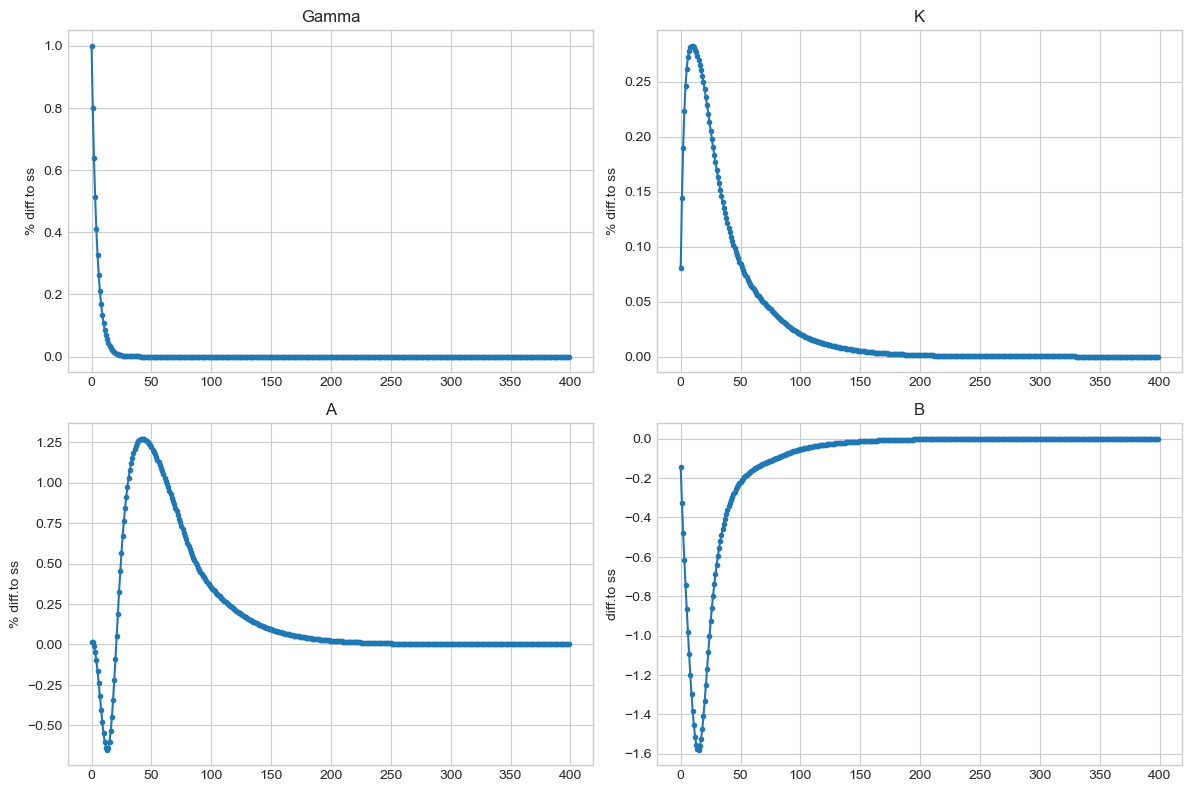

In [9]:
model.plot_IRF_models(ModelList,varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2)